# MORINGA SCHOOL  -  PHASE III PROJECT

## Investigating Customer Churn in SyriaTel, A Telecommunication Company




## A Project by:
<br>

## KEVIN M. RIUNGU
<br>
<br>

### PROJECT OVERVIEW
Customer churn, also known as customer attrition or customer turnover, refers to the rate at which customers stop doing business with a company over a given period of time. It is a crucial metric for businesses, especially those in subscription-based industries or services, as it directly impacts the company's revenue and growth.
<br>
This project sets out to Investigate and analyze factors influencing customer churn in Syriatel - a telecommunication company, using a comprehensive dataset from Kaggle. The project aims to identify patterns and key drivers of customer attrition, providing actionable insights and strategic recommendations to aid Syriatel's decision-makers in implementing effective customer retention strategies.
<br>
<br>

### BUSINESS UNDERSTANDING

In the fiercely competitive telecommunications industry, Syriatel Communications aims to tackle the challenge of customer churn through a proactive and data-driven approach. The objective is to develop a predictive model that identifies potential churners, allowing the implementation of targeted strategies for customer retention and overall business growth.

The benefits are clear: by reducing churn rates, Syriatel anticipates increased revenues, profitability, and market positioning. Customers will enjoy improved services and tailored offerings, while shareholders can expect enhanced returns on their investments. Employees, too, stand to gain through better remuneration and a thriving work environment as the company continues to succeed.

This initiative underscores Syriatel's commitment to innovation, customer satisfaction, and sustained growth, positioning it as a leader in the dynamic telecommunications landscape. Through strategic predictive analytics, the aim is not only to minimize churn but also to create lasting value for all stakeholders.

### OBJECTIVES:

- To identify the key features that determine if a customer is likely to churn.

- To determine the most suitable model to predict Customer Churn.

- To establish Customer retention strategy to reduce churn



### DATA UNDERSTANDING
The data is sourced from Kaggle and contains comprensive information about syriatel customers including whether they terminated their subscriptions with the company or not. 
The dataset contains 3333 entries and 21 columns. 

##### Summary of Features in the Datset

- **State**: *The state the customer lives in*
- **Account Length:** *The number of days the customer has had an account.*
- **Area Code:** *The area code of the customer*
- **Phone Number:** *The phone number of the customer*
- **International Plan:** *True if the customer has the international plan, otherwise false.*
- **Voice Mail Plan:** *True if the customer has the voice mail plan, otherwise false.*
- **Number Vmail Messages:** *the number of voicemails the customer has sent.*
- **Total Day Minutes:** *total number of minutes the customer has been in calls during the day.*
- **Total Day Calls:** *total number of calls the user has done during the day.*
- **Total Day Charge:** *total amount of money the customer was charged by the Telecom company for calls during the day.*
- **Total Eve Minutes:** *total number of minutes the customer has been in calls during the evening.*
- **Total Eve Calls:** *total number of calls the customer has done during the evening.*
- **Total Eve Charge:** *total amount of money the customer was charged by the Telecom company for calls during the evening.*
- **Total Night Minutes:** *total number of minutes the customer has been in calls during the night.*
- **Total Night Calls:** *total number of calls the customer has done during the night.*
- **Total Night Charge:** *total amount of money the customer was charged by the Telecom company for calls during the night.*
- **Total Intl Minutes:** *total number of minutes the user has been in international calls.*
- **Total Intl Calls:** *total number of international calls the customer has done.*
- **Total Intl Charge:** *total amount of money the customer was charged by the Telecom company for international calls.*
- **Customer Service Calls:** *number of calls the customer has made to customer service.*
- **Churn:** *true if the customer terminated their contract, otherwise false*



### DATA PREPARATION
<br>

In [1]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing as preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import f1_score, precision_score, recall_score, log_loss
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from xgboost import XGBClassifier

In [2]:
#Loading the dataset
df = pd.read_csv('SyriaTel_Customer_Churn.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
#Dimensions of the dataset
df.shape

(3333, 21)

In [4]:
#Describing the dataset
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [5]:
# Inspecting presence of Null values
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [6]:
# Checking the datatypes of the features
print(df.dtypes)

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object


In [7]:
# "Area code" seems like a categorical variable encoded as numeric

df['area code'].value_counts()

area code
415    1655
510     840
408     838
Name: count, dtype: int64

In [8]:
# Convert 'area code' to categorical
df['area code'] = df['area code'].astype('category')


In [9]:
# Checking distribution of our target column
churn_counts = df['churn'].value_counts()
churn_counts

churn
False    2850
True      483
Name: count, dtype: int64

In [10]:
df['churn'].value_counts(normalize = True)

churn
False    0.855086
True     0.144914
Name: proportion, dtype: float64

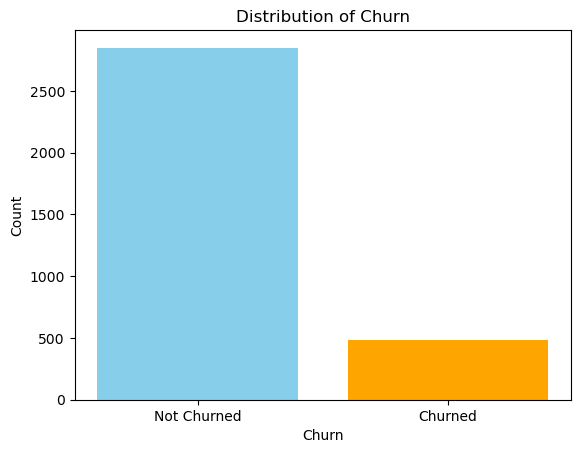

In [11]:
#Distribution of our target variable

plt.bar(churn_counts.index, churn_counts.values, color=['skyblue', 'orange'])
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks(churn_counts.index, labels=['Not Churned', 'Churned'])
plt.show()


The dataset is unbalanced on the ration of 'churn' and 'Not churned' implying that metrics like accuracy score would be deceptive. Therefore metrics like recall and precision and model log loss would be more appropriate. Application of oversampling technique will be considered.

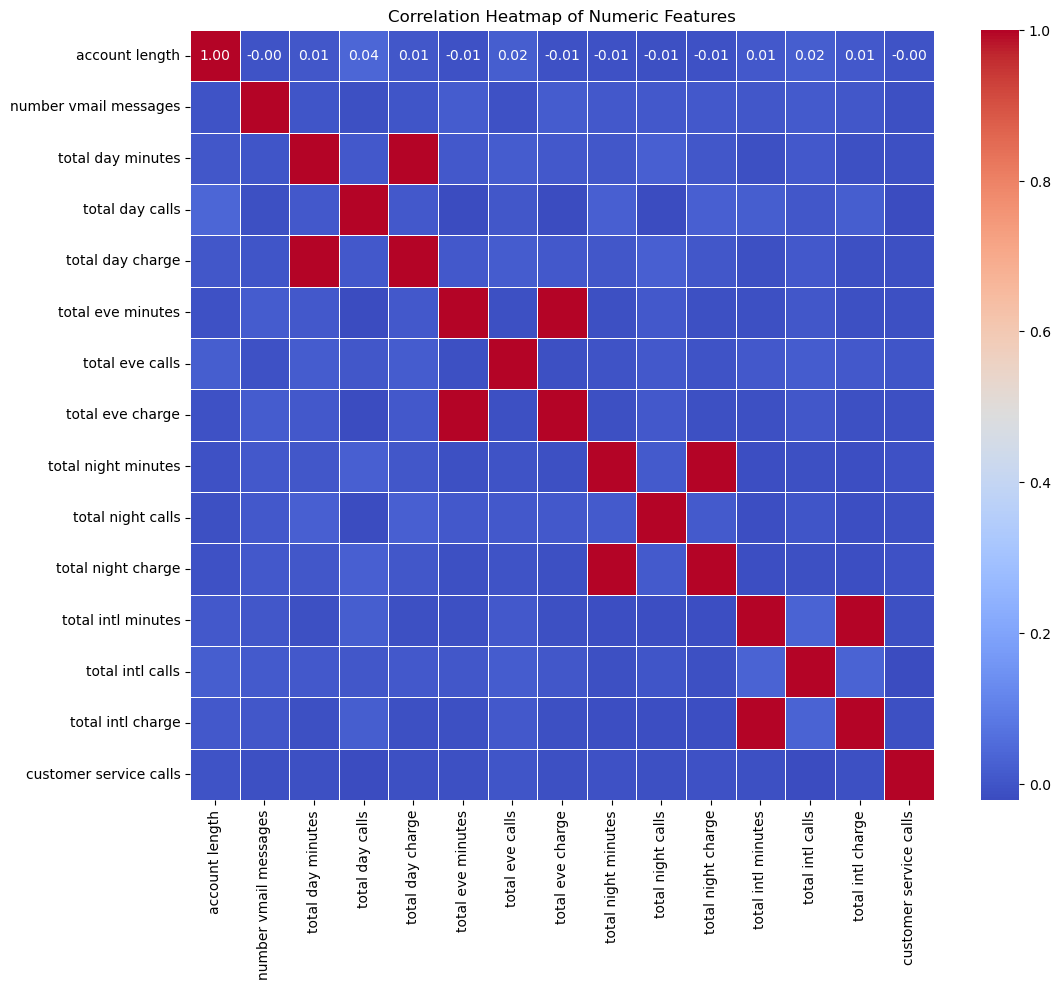

In [12]:
# Checking correlations between features
numeric_df = df.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


## Data Preprocessing

In [13]:
# Separate the target variable and predictor features
y = df['churn']
X = df.drop('churn', axis = 1)

In [14]:
# splitting training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 11)
print(len(X_train), len(X_test), len(y_train), len(y_test))

2499 834 2499 834


In [15]:
#One Hot Encoding Categorical Variables
X_train_categorical = X_train[['state', 'area code', 'international plan', 'voice mail plan']]

In [16]:
ohe = OneHotEncoder(handle_unknown = 'ignore', sparse_output = False)
ohe.fit(X_train_categorical)
X_train_ohe = pd.DataFrame(ohe.transform(X_train_categorical), index = X_train_categorical.index, 
                           columns = np.hstack(ohe.categories_))

In [17]:
# Normalizing/ scaling numeric features
X_train_numeric = X_train[['account length', 'number vmail messages', 'total day minutes', 
                            'total day calls', 'total day charge']]
scaler = MinMaxScaler()
scaler.fit(X_train_numeric)
X_train_scaled = pd.DataFrame(scaler.transform(X_train_numeric), index = X_train_numeric.index, 
                              columns = X_train_numeric.columns)

In [18]:
# concatenating everything back together
X_train_processed = pd.concat([X_train_scaled, X_train_ohe], axis = 1)
X_train_processed.head()

,account length,number vmail messages,total day minutes,total day calls,total day charge,AK,AL,AR,AZ,CA,...,WI,WV,WY,408,415,510,no,yes,no,yes
2329,0.561983,0.000000,0.298461,0.696970,0.298457,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1347,0.454545,0.000000,0.641106,0.709091,0.641013,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2994,0.524793,0.000000,0.649658,0.787879,0.649564,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1412,0.537190,0.470588,0.387400,0.363636,0.387324,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
96,0.297521,0.000000,0.456385,0.666667,0.456405,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


Preprocessing of training data and test data separately helps prevent data leakage


In [19]:
#One Hot Encoding Categorical Variables
X_test_categorical = X_test[['state', 'area code', 'international plan', 'voice mail plan']]

In [20]:

ohe.transform(X_train_categorical)
X_test_ohe = pd.DataFrame(ohe.transform(X_test_categorical), index = X_test_categorical.index, 
                           columns = np.hstack(ohe.categories_))

In [21]:
# Normalizing/ scaling numeric features
X_test_numeric = X_test[['account length', 'number vmail messages', 'total day minutes', 
                            'total day calls', 'total day charge']]
scaler.transform(X_test_numeric)
X_test_scaled = pd.DataFrame(scaler.transform(X_test_numeric), index = X_test_numeric.index, 
                              columns = X_test_numeric.columns)

In [22]:
# concatenating everything back together
X_test_processed = pd.concat([X_test_scaled, X_test_ohe], axis = 1)
X_test_processed.head()

,account length,number vmail messages,total day minutes,total day calls,total day charge,AK,AL,AR,AZ,CA,...,WI,WV,WY,408,415,510,no,yes,no,yes
1615,0.301653,0.00000,0.447834,0.575758,0.447854,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2254,0.396694,0.54902,0.576682,0.587879,0.576626,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2346,0.466942,0.00000,0.482326,0.581818,0.482227,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2073,0.574380,0.00000,0.457526,0.690909,0.457579,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2336,0.500000,0.72549,0.464652,0.648485,0.464621,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


## MODEL FITTING

In [23]:
#Fitting a Vanilla baseline Logistic Regression model
# Convert feature names to strings
X_train_processed.columns = X_train_processed.columns.astype(str)
X_test_processed.columns = X_test_processed.columns.astype(str)
# fitting the Logistic Regression model 
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
model_log = logreg.fit(X_train_processed, y_train)
print(model_log)


LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')


### Evaluating Baseline Model

#### Performance on Training and Testing Data

In [24]:

y_hat_train = logreg.predict(X_train_processed)
print("Training Accuracy: ", accuracy_score(y_train, y_hat_train))

Training Accuracy:  0.8591436574629852


In [25]:
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

       False       0.87      0.98      0.92      2136
        True       0.55      0.16      0.25       363

    accuracy                           0.86      2499
   macro avg       0.71      0.57      0.59      2499
weighted avg       0.83      0.86      0.82      2499



In [26]:
print(confusion_matrix(y_train, y_hat_train))

[[2089   47]
 [ 305   58]]


In [27]:
# Calculating the  precision, recall, and F1 score

precision = precision_score(y_train, y_hat_train)
recall = recall_score(y_train, y_hat_train)
f1 = f1_score(y_train, y_hat_train)

print("Training Precision =", precision)
print("Training recall =", recall)
print("Training F1 Score =", f1)


Training Precision = 0.5523809523809524
Training recall = 0.15977961432506887
Training F1 Score = 0.24786324786324787


In [28]:
#Performance on test data
y_hat_test = logreg.predict(X_test_processed)
Test_precision = precision_score(y_test, y_hat_test)
Test_recall = recall_score(y_test, y_hat_test)
Test_f1 = f1_score(y_test, y_hat_test)
print("Testing Precision =", Test_precision)
print("Testing Recall = ", Test_recall)
print("Training F1 Score =", Test_f1)

Testing Precision = 0.4642857142857143
Testing Recall =  0.10833333333333334
Training F1 Score = 0.17567567567567569


#### Model Confusion Matrix and ROC Curve

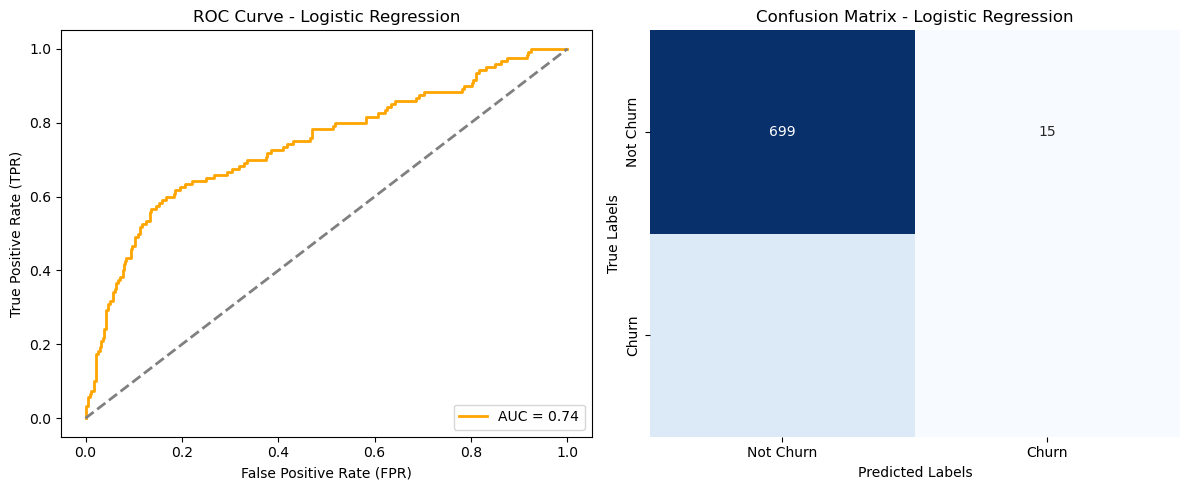

In [29]:
# Predict the labels and decision function for the test set
y_pred = model_log.predict(X_test_processed)
y_proba_logreg = model_log.decision_function(X_test_processed)

# Calculate ROC curve and AUC
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_test, y_proba_logreg)
roc_auc_logreg = roc_auc_score(y_test, y_proba_logreg)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot ROC curve and confusion matrix on the same figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# ROC Curve
ax1.plot(fpr_logreg, tpr_logreg, color='orange', lw=2, label=f'AUC = {roc_auc_logreg:.2f}')
ax1.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
ax1.set_xlabel('False Positive Rate (FPR)')
ax1.set_ylabel('True Positive Rate (TPR)')
ax1.set_title('ROC Curve - Logistic Regression')
ax1.legend(loc='lower right')

# Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'], ax=ax2)
ax2.set_title('Confusion Matrix - Logistic Regression')
ax2.set_xlabel('Predicted Labels')
ax2.set_ylabel('True Labels')

plt.tight_layout()
plt.show()


### Fitting a Decision Tree
<br>

In [30]:
#Training a decision Tree
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, random_state =11)
clf. fit(X_train_processed, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=11)

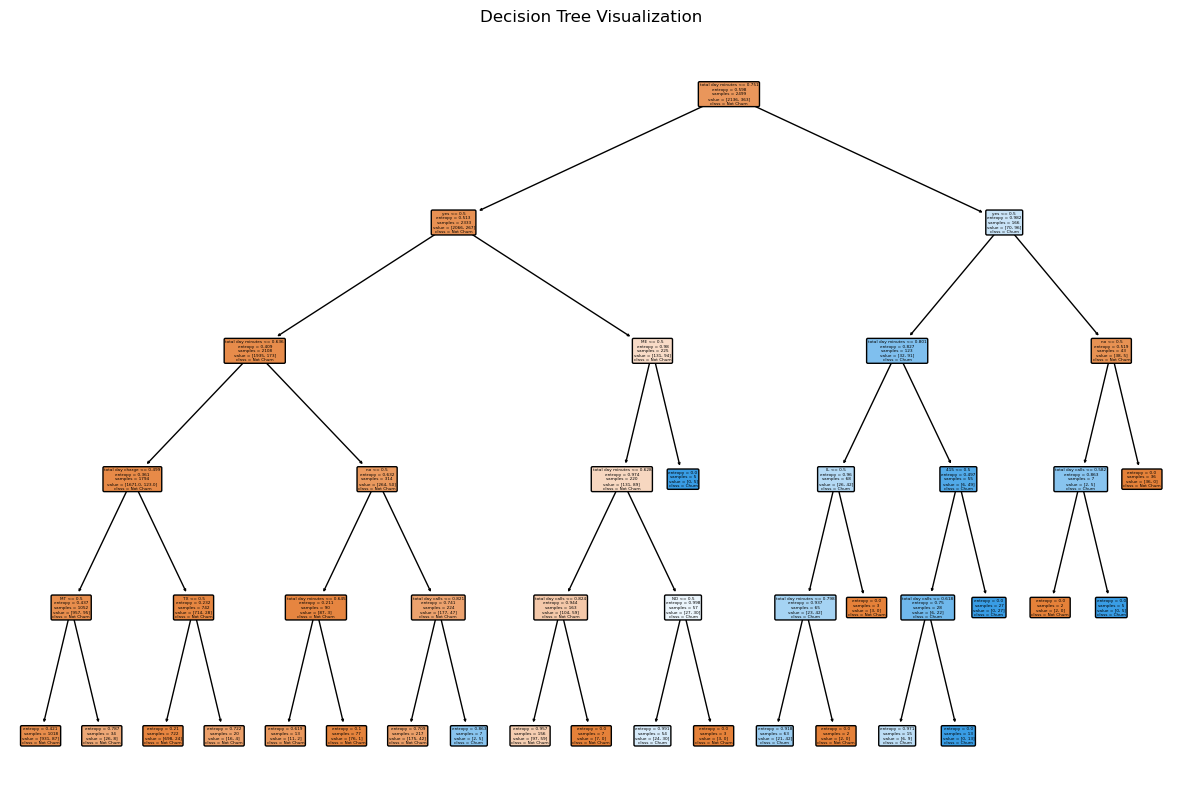

In [31]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Convert RangeIndex to a list of column names
feature_names_list = list(X_train_processed.columns)

# Visualize the trained Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(clf, filled=True, feature_names=feature_names_list, class_names=['Not Churn', 'Churn'], rounded=True)
plt.title('Decision Tree Visualization')
plt.show()


#### Decision Tree Performance on Training and Testing Data

In [32]:

y_preds = clf.predict(X_train_processed)

In [33]:
# Performance on training
dt_precision = precision_score(y_train, y_preds)
dt_recall = recall_score(y_train, y_preds)
dt_F1_score = f1_score(y_train, y_preds)
print("Precision on training =", dt_precision)
print("Recall on Training =", dt_recall)
print("F1 Score on Training =", dt_F1_score)

Precision on training = 0.7195767195767195
Recall on Training = 0.3746556473829201
F1 Score on Training = 0.4927536231884058


In [34]:
# Performance on testing
y_hat = clf.predict(X_test_processed)
dt_test_precision = precision_score(y_test, y_hat)
dt_test_recall = recall_score(y_test, y_hat)
dt_test_F1 = f1_score(y_test, y_hat)
print("Precision on testing =", dt_test_precision)
print("Recall on Testing =", dt_test_recall)
print("F1 Score on Testing =", dt_test_F1)

Precision on testing = 0.6842105263157895
Recall on Testing = 0.325
F1 Score on Testing = 0.4406779661016949


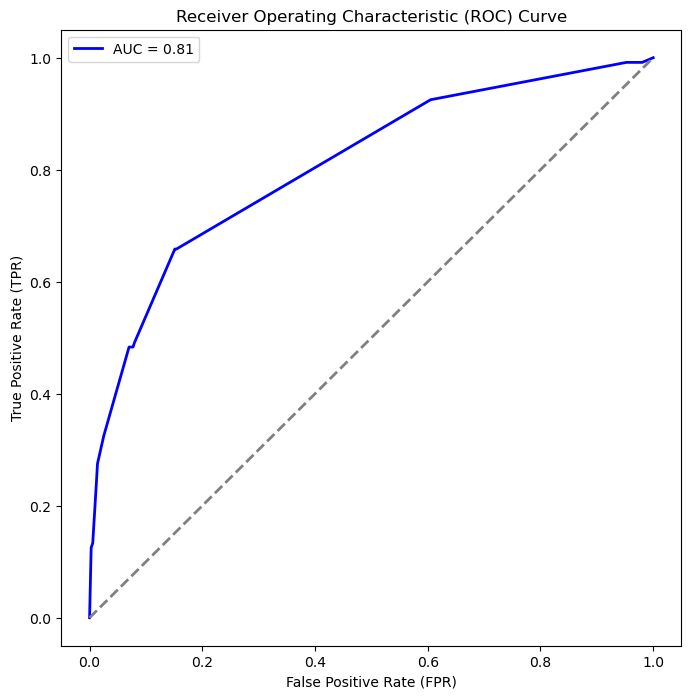

In [35]:
# Predict probabilities for the positive class
y_proba = clf.predict_proba(X_test_processed)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


### Hyperparameter Tuning: <br>Tuned Decision Tree with Cross Validation and Grid Search of Parameters

In [36]:
clf_tuned = DecisionTreeClassifier()
param_grid = {'criterion':['gini', 'entropy'], 'max_depth':[1,2,3,5,10], 'min_samples_split':[2,5,10,20]}
gs_tree = GridSearchCV(clf, param_grid, cv = 5)
gs_tree.fit(X_train_processed, y_train)
gs_tree.best_params_

{'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 2}

#### Tuned Model Performance on Training and Test Data

In [37]:
# Performance on Training Data
y_tuned_preds = gs_tree.predict(X_train_processed)

In [38]:
tuned_precision = precision_score(y_train, y_tuned_preds)
tuned_recall = recall_score(y_train, y_tuned_preds)
tuned_f1 = f1_score(y_train, y_tuned_preds)
print("Tuned Model Training Precision =", tuned_precision)
print("Tuned Model Training Recall =", tuned_recall)
print("Tuned Model Training f1_Score =", tuned_f1)

Tuned Model Training Precision = 0.7416666666666667
Tuned Model Training Recall = 0.24517906336088155
Tuned Model Training f1_Score = 0.36853002070393376


In [39]:
# Performance on Testing Data
y_preds_test = gs_tree.predict(X_test_processed)

In [40]:
tuned_t_precision = precision_score(y_test, y_preds_test)
tuned_t_recall = recall_score(y_test, y_preds_test)
tuned_t_f1 = f1_score(y_test, y_preds_test)
print("Tuned Model Testing Precision =", tuned_t_precision)
print("Tuned Model Testing Recall =", tuned_t_recall)
print("Tuned Model Testing f1_Score =", tuned_t_f1)

Tuned Model Testing Precision = 0.8421052631578947
Tuned Model Testing Recall = 0.26666666666666666
Tuned Model Testing f1_Score = 0.4050632911392405


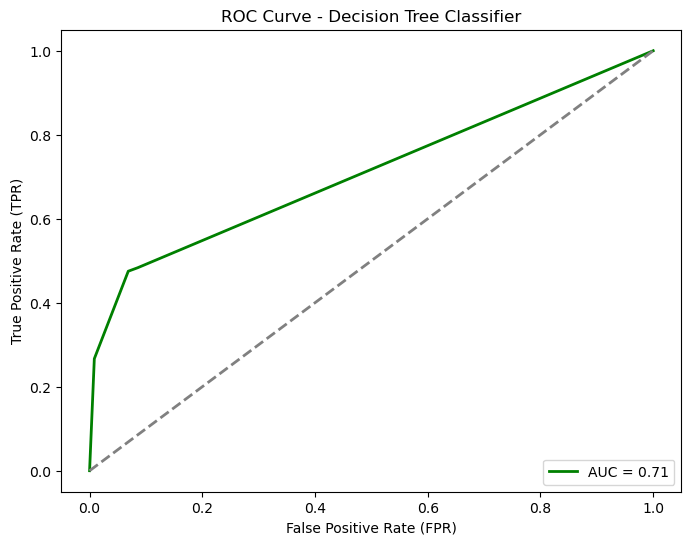

In [41]:
# Get predicted probabilities for the positive class (class 1)
y_proba_tree = gs_tree.predict_proba(X_test_processed)[:, 1]

# Calculate ROC curve
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_test, y_proba_tree)
roc_auc_tree = roc_auc_score(y_test, y_proba_tree)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_tree, tpr_tree, color='green', lw=2, label=f'AUC = {roc_auc_tree:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve - Decision Tree Classifier')
plt.legend(loc='lower right')
plt.show()


### Ensemble Model <br> Random Forest 

In [42]:
forest = RandomForestClassifier(n_estimators = 100, max_depth =5, random_state= 11)
forest.fit(X_train_processed, y_train)

RandomForestClassifier(max_depth=5, random_state=11)

#### Random Forest Performance on Training and Testing data

In [43]:
y_pred_f = forest.predict(X_train_processed)

In [44]:
# Performance on Training data
random_forest_precision = precision_score(y_train, y_pred_f)
random_forest_recall = recall_score(y_train, y_pred_f)
random_forest_f1   = f1_score(y_train, y_pred_f)
print("Random forest Training Precision =", random_forest_precision)
print("Random forest Training Recall =", random_forest_recall)
print("Random forest Training f1_Score =", random_forest_f1)

Random forest Training Precision = 0.8641975308641975
Random forest Training Recall = 0.1928374655647383
Random forest Training f1_Score = 0.3153153153153153


In [45]:
# Performance on Testing data
y_f_test_preds = forest.predict(X_test_processed)
rf_test_precision = precision_score(y_test, y_f_test_preds)
rf_test_recall = recall_score(y_test, y_f_test_preds)
rf_test_f1   = f1_score(y_test, y_f_test_preds)
print("Random forest Training Precision =", rf_test_precision)
print("Random forest Training Recall =", rf_test_recall)
print("Random forest Training f1_Score =", rf_test_f1)

Random forest Training Precision = 0.8214285714285714
Random forest Training Recall = 0.19166666666666668
Random forest Training f1_Score = 0.3108108108108108


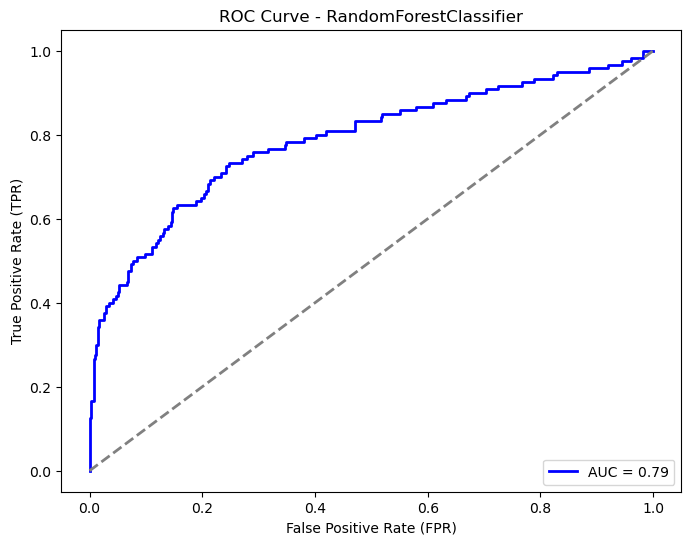

In [46]:
# Get predicted probabilities for the positive class (class 1)
y_proba_forest = forest.predict_proba(X_test_processed)[:, 1]

# Calculate ROC curve
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_test, y_proba_forest)
roc_auc_forest = roc_auc_score(y_test, y_proba_forest)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_forest, tpr_forest, color='blue', lw=2, label=f'AUC = {roc_auc_forest:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve - RandomForestClassifier')
plt.legend(loc='lower right')
plt.show()


#### Features importance

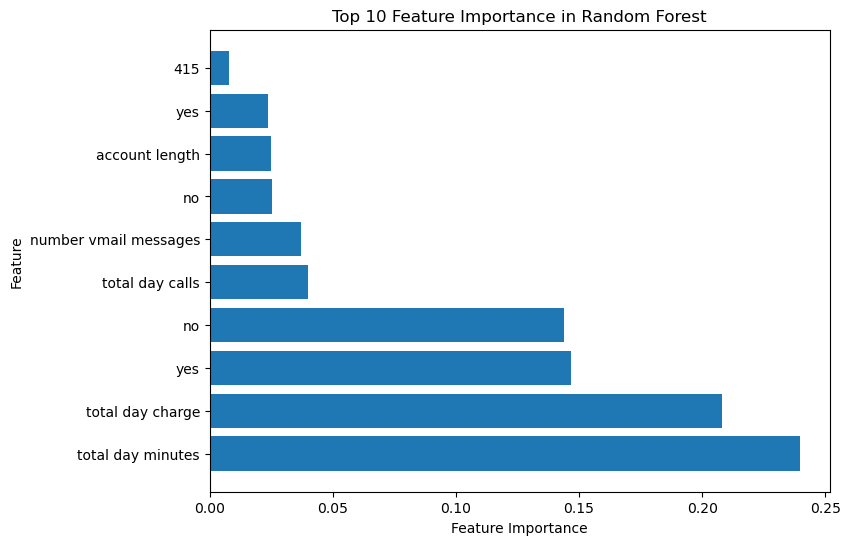

In [47]:
def plot_top_feature_importances(model, top_n=10):
    # Get feature importances and indices
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]

    # Select the top N features
    top_indices = indices[:top_n]
    top_importances = importances[top_indices]
    top_feature_names = X_train_processed.columns.values[top_indices]

    # Plot the top N feature importances
    plt.figure(figsize=(8, 6))
    plt.barh(range(top_n), top_importances, align='center')
    plt.yticks(np.arange(top_n), top_feature_names)
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.title(f'Top {top_n} Feature Importance in Random Forest')
    plt.show()

plot_top_feature_importances(forest, top_n=10)


### GRADIENT BOOSTING <BR> <br> XGBoost

In [48]:
# Instantiate the encoder
encoder = LabelEncoder()

# Fit and transform the training data
y_train = pd.Series(encoder.fit_transform(y_train))

# Transform the test data
y_test = pd.Series(encoder.transform(y_test))

In [54]:
import warnings
# Ensure unique column names
X_train_processed.columns = range(X_train_processed.shape[1])

# Suppress XGBoost FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)


XGB_clf = XGBClassifier()
XGB_clf.fit(X_train_processed, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

#### Performance on Training and Test sets

In [55]:

training_preds = XGB_clf.predict(X_train_processed)

In [56]:

X_test_processed.columns = range(X_test_processed.shape[1])
test_preds = XGB_clf.predict(X_test_processed)

In [57]:
# Performance on Training set
training_precision = precision_score(y_train, training_preds)
training_recall = recall_score(y_train, training_preds)
training_f1_score = f1_score(y_train, training_preds)
print("XGB Training Precision = ", training_precision)
print("XGB Training Recall = ", training_recall)
print("XGB Training f1_score = ", training_f1_score)

XGB Training Precision =  1.0
XGB Training Recall =  0.8402203856749312
XGB Training f1_score =  0.9131736526946108


In [58]:
training_accuracy = accuracy_score(y_train, training_preds)
training_accuracy

0.9767907162865146

In [59]:
# Performance on Testing set
testing_precision = precision_score(y_test, test_preds)
testing_recall = recall_score(y_test, test_preds)
testing_f1_score = f1_score(y_test, test_preds)
print("XGB Testing Precision = ", testing_precision)
print("XGB Testing Recall = ", testing_recall)
print("XGB Testing Precision = ", testing_f1_score)


XGB Testing Precision =  0.6666666666666666
XGB Testing Recall =  0.35
XGB Testing Precision =  0.45901639344262296


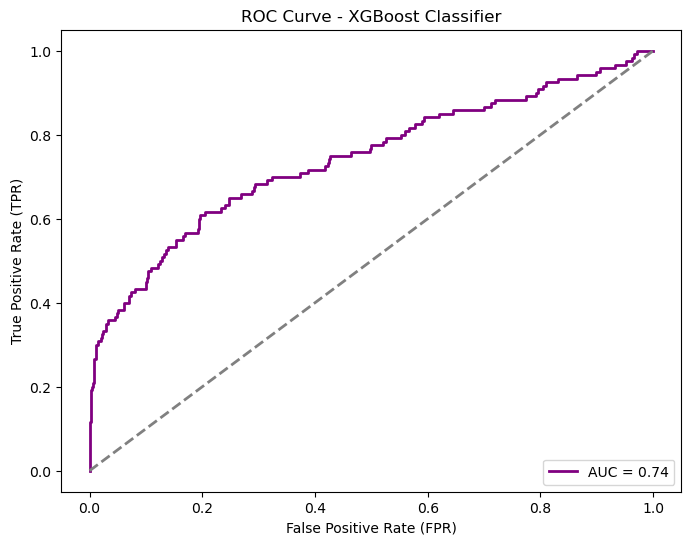

In [60]:
# Get predicted probabilities for the positive class (class 1)
y_proba_xgb = XGB_clf.predict_proba(X_test_processed)[:, 1]

# Calculate ROC curve
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_proba_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_proba_xgb)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='purple', lw=2, label=f'AUC = {roc_auc_xgb:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve - XGBoost Classifier')
plt.legend(loc='lower right')
plt.show()


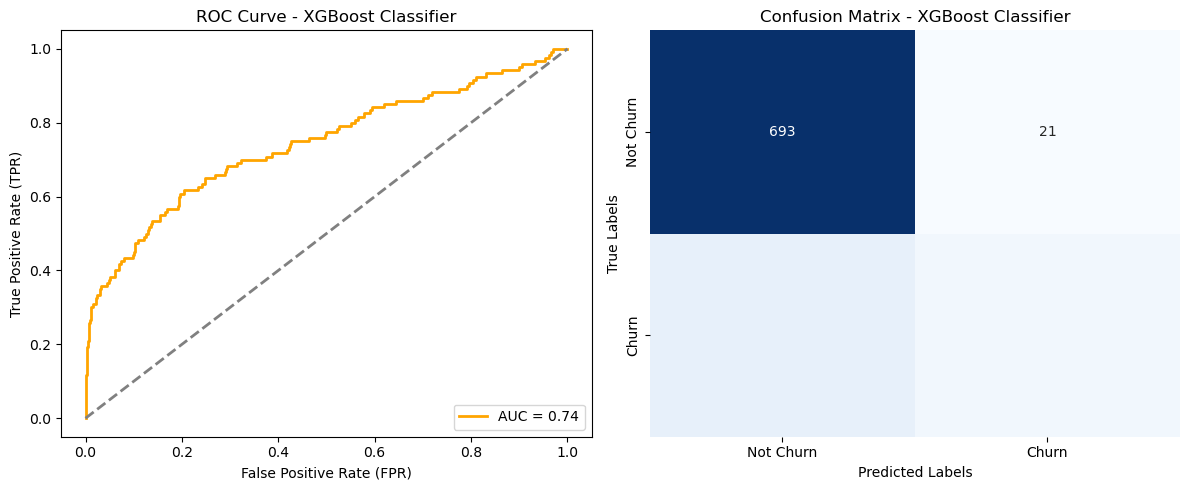

In [61]:

# Get predicted probabilities for the positive class (class 1)
y_proba_xgb = XGB_clf.predict_proba(X_test_processed)[:, 1]

# Calculate ROC curve
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_proba_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_proba_xgb)

# Get predicted labels
y_pred_xgb = XGB_clf.predict(X_test_processed)

# Plot ROC curve
plt.figure(figsize=(12, 5))

# ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr_xgb, tpr_xgb, color='orange', lw=2, label=f'AUC = {roc_auc_xgb:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve - XGBoost Classifier')
plt.legend(loc='lower right')

# Confusion Matrix
plt.subplot(1, 2, 2)
conf_matrix = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.title('Confusion Matrix - XGBoost Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.tight_layout()
plt.show()


### MODEL SELECTION

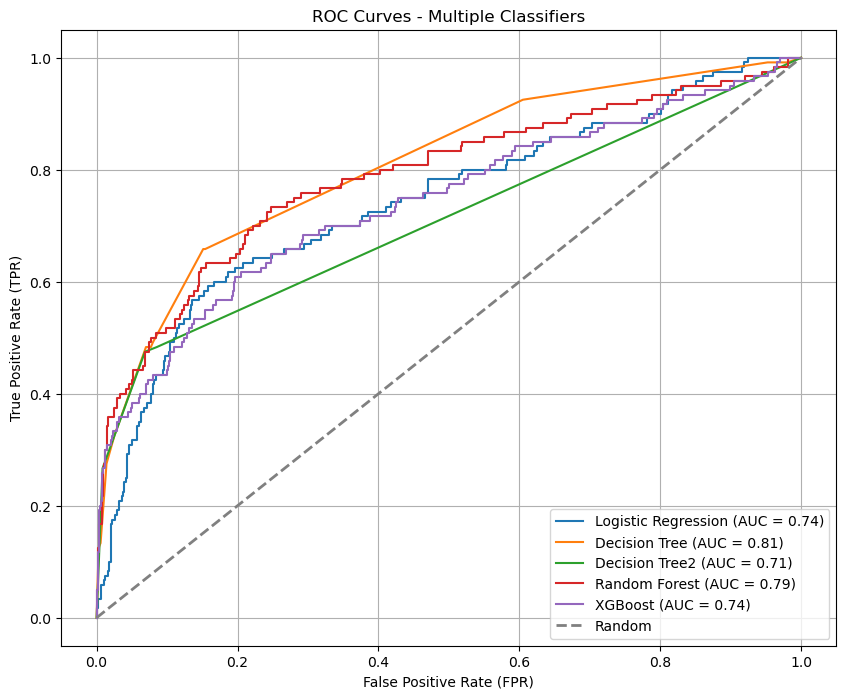

In [62]:
classifiers = [
    ('Logistic Regression', logreg),
    ('Decision Tree', clf),
    ('Decision Tree2', gs_tree),
    ('Random Forest', forest),
    ('XGBoost', XGB_clf),
    # ... Add more classifiers as needed
]

# Plot ROC curves for each classifier on the same figure
plt.figure(figsize=(10, 8))

for clf_name, clf in classifiers:
    # Ensure unique column names
    X_train_processed.columns = range(X_train_processed.shape[1])
    
    # Train the classifier
    clf.fit(X_train_processed, y_train)
    
    # Get predicted probabilities for the positive class (class 1)
    y_proba = clf.predict_proba(X_test_processed)[:, 1]

    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = roc_auc_score(y_test, y_proba)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{clf_name} (AUC = {roc_auc:.2f})')

# Plot the random classifier for reference (diagonal line)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2, label='Random')

# Customize the plot
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curves - Multiple Classifiers')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


Comparing the AUC for all the models, it was established that the Random Forest Classifier had the highest (AUC = 0.79) and best classification performance. Therefore Random Forest was chosen as the most efficient model for the classification task.

### Conclusions & Recommendations
In summary, the analysis indicates a high level of accuracy in predicting customer churn through the application of machine learning techniques. The Random Forest Classifier emerges as the recommended model, showcasing superior overall performance. Its ROC curve gracefully aligns with the upper left corner of the graph, resulting in the largest Area Under the Curve (AUC).

- The study Recommend adopting Random Forest Classifier as the primary model for predicting customer churn.-
- Business Strategic Recommendations for SyriaTel:
    - Implement a targeted Customer Retention strategy.
    - Focus on key features related to call minutes and charges.
    - Consider personalized offers or discounts on daily charges.
    - Aim to retain customers and minimize potential revenue loss.
    - Address factors contributing to Customer Churn:
    - Develop strategies to reduce customer service calls.
    - Enhance customer experience and satisfaction.



